<a href="https://colab.research.google.com/github/VemareddyDaram/BERT-Word-Embedding/blob/main/BERT_Word_Embedding_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1-1057174907.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Subtitle'] = df_filtered['Subtitle'].apply(lambda x: "Shorts" if "Shorts" in x else x)
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Generating BERT embeddings: 100%|██████████| 155/155 [01:05<00:00,  2.38it/s]


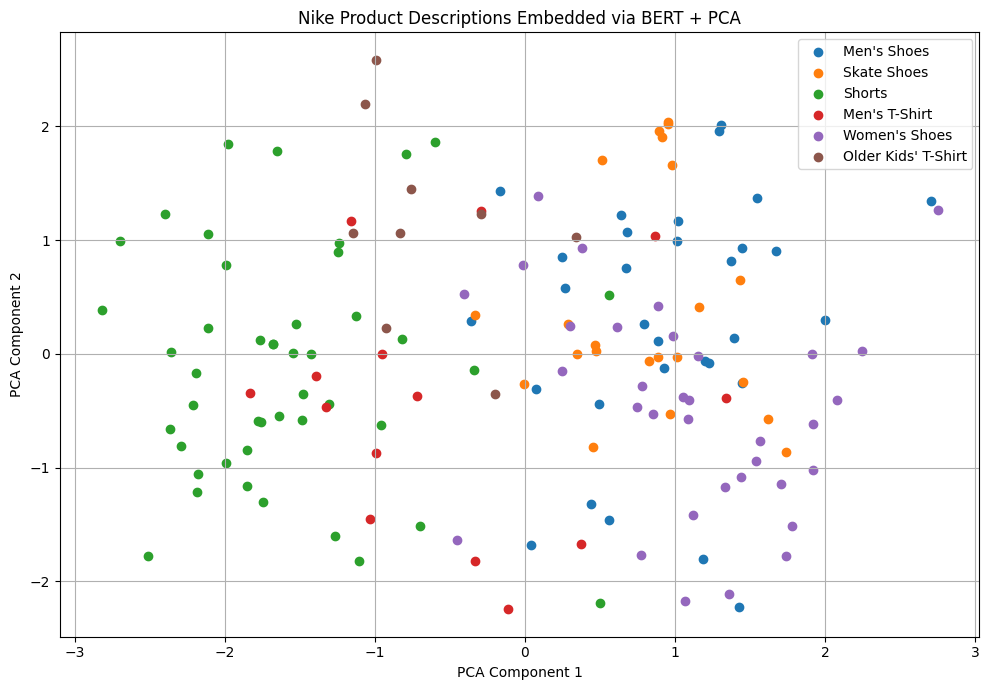

In [1]:
# Install dependencies (uncomment if needed)
# !pip install transformers torch scikit-learn matplotlib pandas

# Step 1: Import libraries
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tqdm import tqdm

# Step 2: Load the dataset
df = pd.read_csv("/content/NikeProductDescriptions (1).csv")

# Step 3: Filter specific product categories
target_subtitles = ["Men's Shoes", "Men's T-Shirt", "Women's Shoes", "Skate Shoes", "Older Kids' T-Shirt"]
df_filtered = df[df['Subtitle'].isin(target_subtitles) | df['Subtitle'].str.contains("Shorts", case=False)]
df_filtered['Subtitle'] = df_filtered['Subtitle'].apply(lambda x: "Shorts" if "Shorts" in x else x)

# Step 4: Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()

# Step 5: Define embedding function
def get_bert_embedding(text):
    with torch.no_grad():
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
        outputs = model(**inputs)
        return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Step 6: Generate BERT embeddings
embeddings = []
for desc in tqdm(df_filtered['Product Description'], desc="Generating BERT embeddings"):
    embeddings.append(get_bert_embedding(desc))

# Step 7: Reduce dimensions using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Step 8: Plot the results
plt.figure(figsize=(10, 7))
categories = df_filtered['Subtitle'].unique()
colors = plt.cm.tab10.colors

for i, category in enumerate(categories):
    idx = df_filtered['Subtitle'] == category
    plt.scatter(embeddings_2d[idx, 0], embeddings_2d[idx, 1], label=category, color=colors[i % len(colors)])

plt.title("Nike Product Descriptions Embedded via BERT + PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()